In [1]:
import numpy as np
import netCDF4 as nc
import os
import scipy as sc, scipy.io
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from salishsea_tools.nc_tools import scDataset
import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
%matplotlib inline

from IPython.display import Image

/home/imachuca/anaconda3/envs/gsw/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [25]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
k_eyeballed = 4.62e-07

In [3]:
# changing frequency guesses

k_first= np.round(k_eyeballed*0.05,10)
increment = np.round(k_first*0.75,10)
numb_freq = 200
f_guess = 3.3e-06

print(f_guess*1,numb_freq,k_first,increment) # wave
print(f_guess*2) # none
print(f_guess*1.5) # wave
print(f_guess*1.8) # none
print(f_guess*1.7) # none - cancelled
print(f_guess*1.6) # none
print(f_guess*1.52) # wave

3.3e-06 200 2.31e-08 1.73e-08
6.6e-06
4.95e-06
5.940000000000001e-06
5.6100000000000005e-06
5.28e-06
5.016e-06


In [4]:
# reducing the wavenumbers to find higher frequencies (i.e. lower modes)

k_first= np.round(k_eyeballed*0.005,10)
increment = np.round(k_first*0.75,10)
numb_freq = 200
f_guess = 3.3e-06

print(f_guess*1.6,numb_freq,k_first,increment) # first without wave


5.28e-06 200 2.3e-09 1.7e-09


# Sets k-w 

|label|frequency first guess|number of frequencies|first wavenumber|increments|filename|
|-----|--------|----|---------|---------|---------------|
|A|3.3e-06 |200 |2.31e-08 |1.73e-08 |dispc_33e06.dat|
|B|4.95e-06 |200 |2.31e-08 |1.73e-08 |dispc_495e06.dat|
|C|5.016e-06 |200 |2.31e-08 |1.73e-08 |dispc_502e06.dat|
|D|5.28e-06 |50 |2.3e-09 |1.7e-09|dispc_528e06.dat|
|E|0.008 |50 |1.15e-09 |8.62e-10|dispc_08e2.dat|

# Dispersion curves

In [5]:
def axis_properties(ax, xmin, xmax, ymin, ymax):
    ax.legend()
    ax.axhline(0,lw=2,c='k',zorder=1)
    ax.set_xlabel('wavenumber $\kappa$ (rad/cm)', fontsize=16)
    ax.set_ylabel('frequency $\omega$ (rad/sec)', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    return

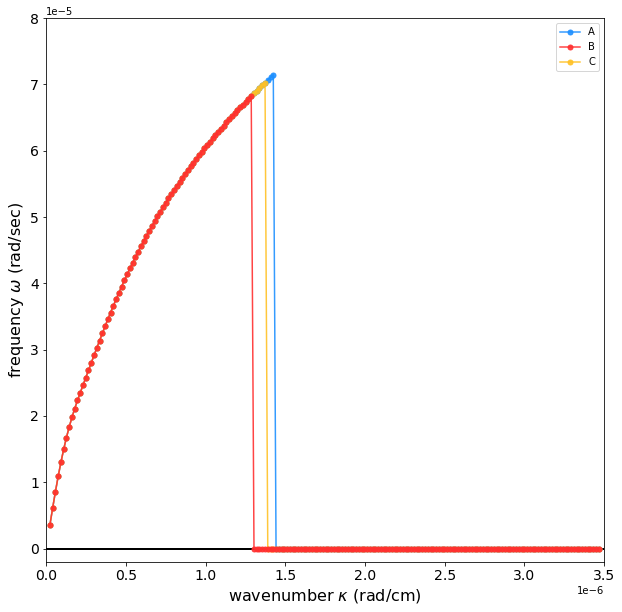

In [6]:
fnames = ['dispc_33e06.dat', 'dispc_495e06.dat', 'dispc_502e06.dat']
colours = ['#1E90FF', '#FF3030', '#FFC125']
zorders = [2, 4, 3]
labels = ['A', 'B', 'C']

fig, ax = plt.subplots(1,1,figsize=(10, 10))

for fname, c, zo, lab, n in zip(fnames, colours, zorders, labels, np.arange(len(fnames))):
    output = np.loadtxt('/ocean/imachuca/CTW_Brink/output/'+fname)
    wavenumber = output[:, 0] #rad/cm
    frequency = output[:, 1] #rad/sec
    ax.plot(wavenumber, frequency, marker='.', ms=10, c=c, alpha=0.9, zorder=zo, label=lab)
axis_properties(ax, 0, 3.5e-06, -0.2e-5, 8e-5)

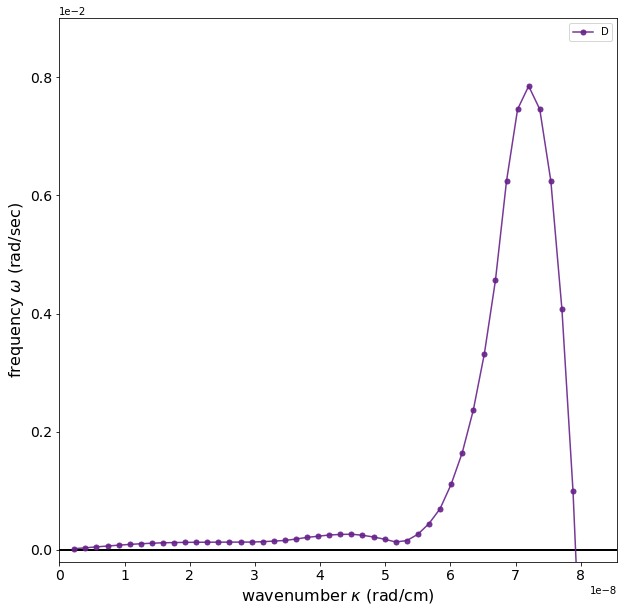

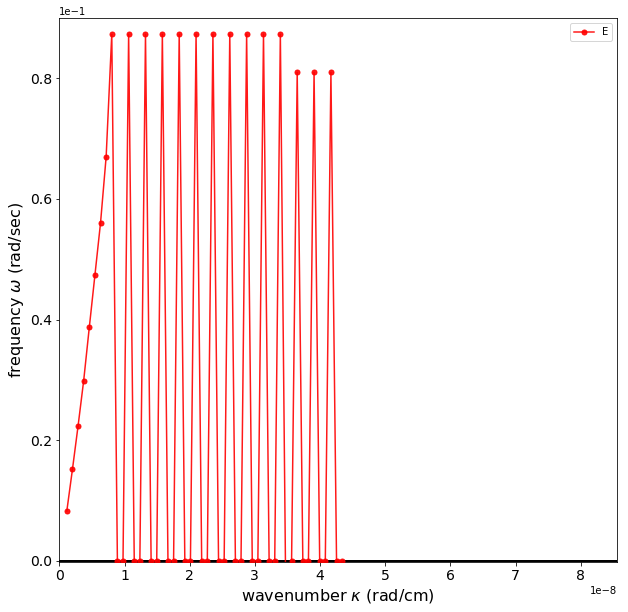

In [24]:
fnames=['dispc_528e06.dat', 'dispc_08e2.dat']
zorders=[2,3]
labels=['D','E']
colours=['#68228B','r']
ymaxs = [9e-3,9e-2]

for fname, c, zo, lab, ymax, n in zip(fnames, colours, zorders, labels, ymaxs, np.arange(len(fnames))):
    fig, ax = plt.subplots(1,1,figsize=(10, 10))
    output = np.loadtxt('/ocean/imachuca/CTW_Brink/output/'+fname)
    wavenumber = output[:, 0] #rad/cm
    frequency = output[:, 1] #rad/sec
    ax.plot(wavenumber, frequency, marker='.', ms=10, c=c, alpha=0.9, zorder=zo, label=lab)
    axis_properties(ax, 0, 8.56e-08, -0.2e-3, ymax)

In [8]:
k_first= np.round(k_eyeballed*0.005,10)*0.5
increment = np.round(k_first*0.75,12)
numb_freq = 50
f_guess = 0.8e-2

print(f_guess,numb_freq,k_first,increment) # first without wave

0.008 50 1.15e-09 8.62e-10


In [9]:
print('wavenumber, wavenumber_first, numb_freq, increment', k_eyeballed, k_first, numb_freq, increment)

for i in range(numb_freq):
    k_next = np.round((i*increment)+k_first,12)
    print(i,k_next)

wavenumber, wavenumber_first, numb_freq, increment 4.62e-07 1.15e-09 50 8.62e-10
0 1.15e-09
1 2.012e-09
2 2.874e-09
3 3.736e-09
4 4.598e-09
5 5.46e-09
6 6.322e-09
7 7.184e-09
8 8.046e-09
9 8.908e-09
10 9.77e-09
11 1.0632e-08
12 1.1494e-08
13 1.2356e-08
14 1.3218e-08
15 1.408e-08
16 1.4942e-08
17 1.5804e-08
18 1.6666e-08
19 1.7528e-08
20 1.839e-08
21 1.9252e-08
22 2.0114e-08
23 2.0976e-08
24 2.1838e-08
25 2.27e-08
26 2.3562e-08
27 2.4424e-08
28 2.5286e-08
29 2.6148e-08
30 2.701e-08
31 2.7872e-08
32 2.8734e-08
33 2.9596e-08
34 3.0458e-08
35 3.132e-08
36 3.2182e-08
37 3.3044e-08
38 3.3906e-08
39 3.4768e-08
40 3.563e-08
41 3.6492e-08
42 3.7354e-08
43 3.8216e-08
44 3.9078e-08
45 3.994e-08
46 4.0802e-08
47 4.1664e-08
48 4.2526e-08
49 4.3388e-08
